## Yahoo Finance Exploration

### 1. Retrieving packages

In [1]:
#General libraries
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#Finance libraries
import yfinance as yf
import quandl

#Scraping libraries
import bs4 as bs
import requests

#Machine learning libraries
%matplotlib inline

### 2. Getting data

In [2]:
appl=yf.download("AAPL", start="2019-01-01", end="2020-10-30", progress=False)

In [3]:
appl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.562561,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.721451,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.203678,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.123104,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.811718,164101200
2019-01-09,37.822498,38.632500,37.407501,38.327499,37.436844,180396400
2019-01-10,38.125000,38.492500,37.715000,38.450001,37.556507,143122800
2019-01-11,38.220001,38.424999,37.877499,38.072498,37.187771,108092800
2019-01-14,37.712502,37.817501,37.305000,37.500000,36.628578,129756800


### 3. Getting different tickers

In [4]:
lista_close=[]

##Companies
#ls_symbols = ["AAPL", "GOOG","ORCL"] 

#Cryptos
ls_symbols = ["BTC-USD", "ETH-USD", "XRP-USD", 
              "LTC-USD", "BNB-USD" ]

for z in ls_symbols:
    stock=yf.download(z, start="2019-01-01", end="2020-11-25", progress=False)
    stock_close=pd.DataFrame(stock["Adj Close"])
    stock_close2=stock_close.rename(columns={"Adj Close":z})
    lista_close.append(stock_close2)
    

In [5]:
all_stocks=pd.concat(lista_close, axis=1)

In [23]:
all_stocks.head(10)

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,BNB-USD
Date,,,,,
2019-01-01,3843.520020,140.819412,0.364771,31.979931,6.075273
2019-01-02,3943.409424,155.047684,0.375243,33.433681,6.188613
2019-01-03,3836.741211,149.135010,0.360224,32.026699,5.903534
2019-01-04,3857.717529,154.581940,0.356747,32.404167,6.065138
2019-01-05,3845.194580,155.638596,0.355275,34.936867,6.065543
2019-01-06,4076.632568,157.746201,0.368395,39.298855,6.395979
2019-01-07,4025.248291,151.699219,0.364347,37.806274,6.291411
2019-01-08,4030.847900,150.359634,0.365315,39.479717,6.640054
2019-01-09,4035.296387,150.803116,0.370890,38.985535,6.641550


In [24]:
all_stocks2=all_stocks.pct_change()
all_stocks2.head(10)

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,BNB-USD
Date,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.025989,0.101039,0.028708,0.045458,0.018656
2019-01-03,-0.027050,-0.038135,-0.040024,-0.042083,-0.046065
2019-01-04,0.005467,0.036523,-0.009650,0.011786,0.027374
2019-01-05,-0.003246,0.006836,-0.004127,0.078160,0.000067
2019-01-06,0.060189,0.013542,0.036930,0.124853,0.054478
2019-01-07,-0.012605,-0.038334,-0.010990,-0.037980,-0.016349
2019-01-08,0.001391,-0.008831,0.002657,0.044264,0.055416
2019-01-09,0.001104,0.002949,0.015262,-0.012517,0.000225


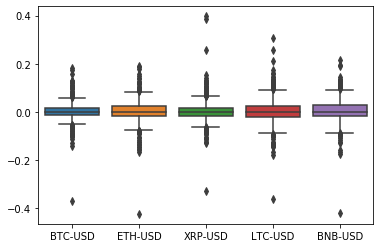

In [8]:
sns.boxplot(data=all_stocks2)

In [9]:
corr_cryptos=all_stocks2.corr()

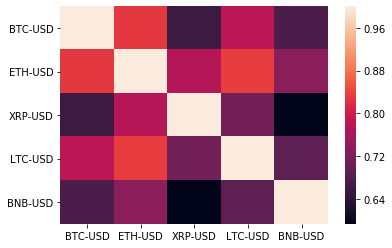

In [10]:
sns.heatmap(corr_cryptos)

<Figure size 4800x3200 with 0 Axes>

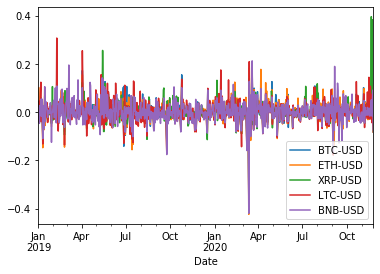

In [22]:
plt.figure(figsize=(24,16), dpi=200, edgecolor='k')
fig, ax = plt.subplots()
for column in all_stocks2.columns:
    all_stocks2[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

#### 4. Getting tickers with web scraping

In [11]:
sp500=requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")

In [12]:
sp500.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of S&amp;P 500 companies - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"X@aq1ApAEKIAANYsTNcAAADC","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_S\\u0026P_500_companies","wgTitle":"List of S\\u0026P 500 companies","wgCurRevisionId":996341631,"wgRevisionId":996341631,"wgArticleId":2676045,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","All articles with dead external links","Articles with dead external links from November

In [13]:
soup=bs.BeautifulSoup(sp500.text, "lxml")
sp500_table=soup.find("table",{"class":"wikitable sortable"})
tickers=[]
for row in sp500_table("tr")[1:]:
    ticker=row.findAll("td")[0].text
    tickers.append(ticker)

In [14]:
tickers[0]

'MMM\n'

In [15]:
lista_close=[]
ls_symbols = tickers
for z in ls_symbols:
    stock=yf.download(z, start="2019-01-01", end="2020-11-25", progress=False)
    stock_close=pd.DataFrame(stock["Adj Close"])
    stock_close2=stock_close.rename(columns={"Adj Close":z})
    lista_close.append(stock_close2)     


1 Failed download:
- BRK.B: No data found, symbol may be delisted

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted


KeyboardInterrupt: 

In [ ]:
len(lista_close)

In [ ]:
all_stocks=pd.concat(lista_close, axis=1)

In [ ]:
all_stocks.head()

In [ ]:
all_stocks["ORCL\n"].plot()

In [ ]:
all_stocks.to_excel("F:/PythonTraining/PythonTrain_General/4_DataModelling/Yahoo_Finance/allstocks.xlsx")

In [ ]:
yf.tickers